In [61]:
import pandas as pd
import numpy as np
import xlrd

In [97]:
df = pd.read_excel("melt_data.xlsx")

In [98]:
df.head()

,InteractionsBeforeEnrollment,LeadCategory,LeadSource,LeadSubCategory,Is_mobileno_given,OwnerId,Status,Is_telephoneno_given,confirminterest,leadid,...,motivation,batch_code,dropout_history,mentor,instructor_name,instructor_department,full_access_trial,prerequisite_details,help_from_peers,FAQ
0,0,Website,Website,Referral,NO,Bryan Oliver,Non-melt,YES,False,2aa5f87c-555a-e411-80bf-00155dcfd953,...,YES,8,YES,Cathy McKay,Carmen Dallas,Administration,YES,YES,YES,YES
1,0,Website,Website,Application,NO,Bryan Oliver,Non-melt,YES,False,31a5f87c-555a-e411-80bf-00155dcfd953,...,YES,10,NO,Tiffany Hamlett,Dennis Ratliff,Teaching,YES,YES,YES,YES
2,0,Website,Website,Application,YES,James Anderson,Non-melt,YES,False,68a5f87c-555a-e411-80bf-00155dcfd953,...,YES,5,NO,Crystal Neumann,Raymond Velez,Education,YES,YES,NO,YES
3,0,Website,Website,Application,YES,Larry User,Non-melt,YES,False,6fa5f87c-555a-e411-80bf-00155dcfd953,...,YES,1,NO,Tiffany Hamlett,Fawzia Boling,Administration,YES,YES,YES,NO
4,0,Website,Website,Application,YES,Larry User,Melt,YES,False,76a5f87c-555a-e411-80bf-00155dcfd953,...,NO,3,YES,Debbie Beck,Jason Hutchinson,Administration,YES,NO,NO,NO


In [99]:
# df.columns

In [133]:
df.FAQ.value_counts()

False    34387
Name: FAQ, dtype: int64

In [101]:
df.LeadCategory=df.LeadCategory.fillna("Other")
df.LeadSubCategory=df.LeadSubCategory.fillna("Other")
df.LeadSource=df.LeadSource.fillna("Other")
df.mentor=df.mentor.fillna("Other")

In [102]:
df.LeadCategory=df.LeadCategory.str.lower()
df.LeadSubCategory=df.LeadSubCategory.str.lower()
df.LeadSource=df.LeadSource.str.lower()
df.mentor=df.mentor.str.lower()
df.experience_level=df.experience_level.str.lower()

In [135]:
selected_fields=['experience_level','batch_code','mentor','Status']

In [137]:
for _col in selected_fields:
    print(_col, df[_col].value_counts())

experience_level 2    20575
1     6952
0     6860
Name: experience_level, dtype: int64
batch_code 4    3513
2    3493
0    3467
8    3464
7    3463
6    3447
5    3438
9    3407
1    3365
3    3330
Name: batch_code, dtype: int64
mentor 0    6820
1    6758
2    6741
5    6717
3    6712
4     639
Name: mentor, dtype: int64
Status 1    27510
0     6877
Name: Status, dtype: int64


In [138]:
df.financial_aid = df.financial_aid.astype(bool)
df.motivation = df.motivation.astype(bool)
df.dropout_history = df.dropout_history.astype(bool)
df.full_access_trial = df.full_access_trial.astype(bool)
df.prerequisite_details= df.prerequisite_details.astype(bool)
df.help_from_peers = df.help_from_peers.astype(bool)
df.FAQ = df.FAQ.astype(bool)

In [139]:
df = df[selected_fields]

In [140]:
df.head()

,experience_level,batch_code,mentor,Status
0,2,7,1,1
1,2,9,5,1
2,2,4,2,1
3,2,0,5,1
4,2,2,3,0


In [141]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
# le.fit(df.Status)
# le.classes_

In [142]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
np.random.seed(7)

In [143]:
df.head()

,experience_level,batch_code,mentor,Status
0,2,7,1,1
1,2,9,5,1
2,2,4,2,1
3,2,0,5,1
4,2,2,3,0


In [144]:
df.describe()

,experience_level,batch_code,mentor,Status
count,34387.000000,34387.000000,34387.000000,34387.000000
mean,1.398843,4.504057,2.225172,0.800012
std,0.799233,2.870406,1.722433,0.399997
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000
50%,2.000000,5.000000,2.000000,1.000000
75%,2.000000,7.000000,3.000000,1.000000
max,2.000000,9.000000,5.000000,1.000000


#  RF

In [145]:
from sklearn.model_selection import train_test_split
feature_names = df.columns[:-1] 
# target_names = df.columns[-1:]
X_train, X_test, y_train, y_test = train_test_split(df.ix[:,0:-1], df.ix[:,-1:], test_size=0.20, random_state=42)

/home/maheshdivakaran/anaconda3/envs/suyati/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [147]:
clf = RandomForestClassifier(max_depth=3, n_estimators=1000, random_state=13)

In [148]:
clf.fit(X_train, y_train)

/home/maheshdivakaran/anaconda3/envs/suyati/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [149]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

batch_code          0.459162
mentor              0.280665
experience_level    0.260173
dtype: float64

In [150]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
# prediction on test set
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))


Accuracy: 0.8070660075603373


In [156]:
clf.predict([[0,1,5]])

array([1])

In [151]:
from sklearn import tree

In [86]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [89]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("ACE") 

'ACE.pdf'

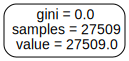

In [88]:
dot_data = tree.export_graphviz(clf, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [153]:
import pickle
# now you can save it to a file
with open('Melt.pkl', 'wb') as f:
    pickle.dump(clf, f)